# Ejemplo 1

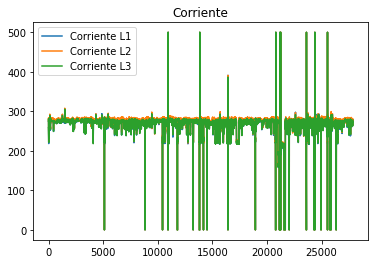

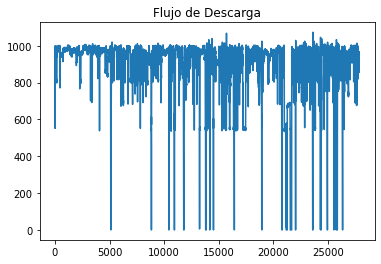

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data=pd.read_csv('Bba118.csv')  
Datos=Data.to_numpy()

plt.figure()
plt.plot(Datos[:,1])
plt.plot(Datos[:,2])
plt.plot(Datos[:,3])
plt.title('Corriente')
plt.legend(['Corriente L1','Corriente L2','Corriente L3'])
plt.show()

plt.figure()
plt.plot(Datos[:,4])
plt.title('Flujo de Descarga')
plt.show()




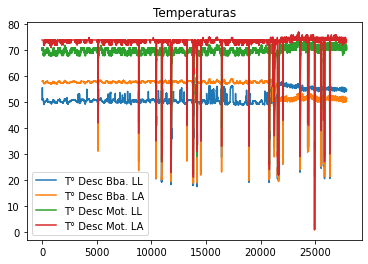

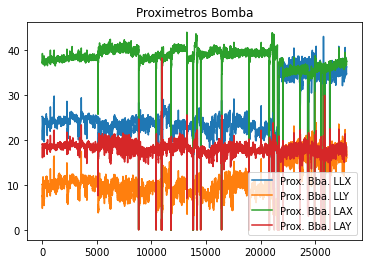

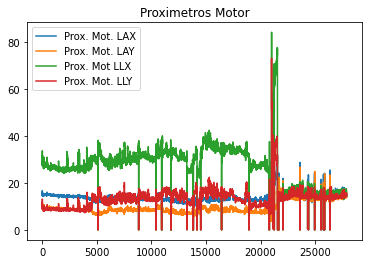

In [2]:
plt.figure()
plt.plot(Datos[:,5])
plt.plot(Datos[:,6])
plt.plot(Datos[:,7])
plt.plot(Datos[:,8])
plt.title('Temperaturas')
plt.legend(['T° Desc Bba. LL','T° Desc Bba. LA','T° Desc Mot. LL','T° Desc Mot. LA'])
plt.show()

plt.figure()
plt.plot(Datos[:,9])
plt.plot(Datos[:,10])
plt.plot(Datos[:,11])
plt.plot(Datos[:,12])
plt.title('Proximetros Bomba')
plt.legend(['Prox. Bba. LLX','Prox. Bba. LLY','Prox. Bba. LAX','Prox. Bba. LAY'])
plt.show()

plt.figure()
plt.plot(Datos[:,13])
plt.plot(Datos[:,14])
plt.plot(Datos[:,15])
plt.plot(Datos[:,16])
plt.title('Proximetros Motor')
plt.legend(['Prox. Mot. LAX','Prox. Mot. LAY','Prox. Mot LLX','Prox. Mot. LLY'])
plt.show()


In [3]:
#eliminar detenciones
Datos=Data.to_numpy()
a=Datos[:,4]>=550
Datos=Datos[a,:]

#media móvil próximetros
media_movil=500;
for i in range(9,17):
    d = pd.Series(Datos[:,i])
    mv=d.rolling(media_movil).mean()
    Datos[:,i]=Datos[:,i]-mv

Datos=Datos[media_movil:,:] 


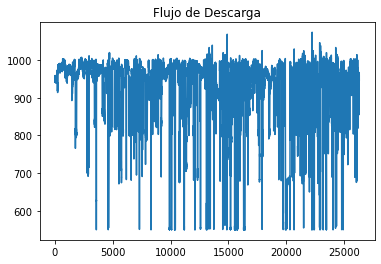

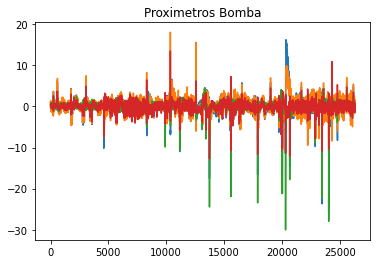

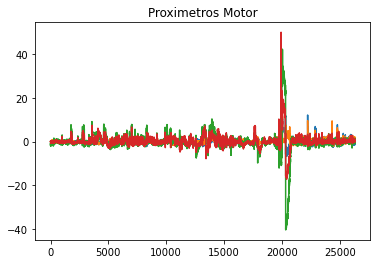

In [4]:
plt.figure()
plt.plot(Datos[:,4])
plt.title('Flujo de Descarga')
plt.show()
    
plt.figure()
plt.plot(Datos[:,9])
plt.plot(Datos[:,10])
plt.plot(Datos[:,11])
plt.plot(Datos[:,12])
plt.title('Proximetros Bomba')
plt.show()

plt.figure()
plt.plot(Datos[:,13])
plt.plot(Datos[:,14])
plt.plot(Datos[:,15])
plt.plot(Datos[:,16])
plt.title('Proximetros Motor')
plt.show()


In [6]:
Datos.shape

(26313, 17)

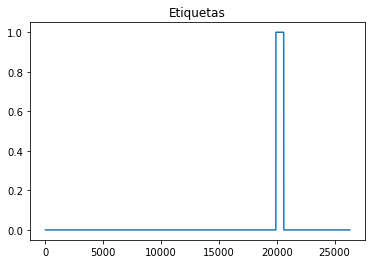

In [82]:
#etiqueta
Yt=np.zeros((26313,1))
Yt[19920:20600]=1

plt.figure()
plt.plot(Yt)
plt.title('Etiquetas')
plt.show()

np.save('Datos.npy', Datos) 
np.save('Yt.npy', Yt) 


In [83]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

Datos=np.load('Datos.npy',allow_pickle=True)
Datos=Datos[:,9:17]
Yt=np.load('Yt.npy',allow_pickle=True)

outlier_frac=0.01 #fracción de valores anomalos, valor por defecto es 0.1
Model= EllipticEnvelope(contamination=outlier_frac)
title='Elliptic Envelope'
# Model=IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_frac)
# title='Isolation Forest'
# Model = LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac)
# title='LOF'
# Model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
# title='OC-SVM'
Yp=Model.fit_predict(Datos)


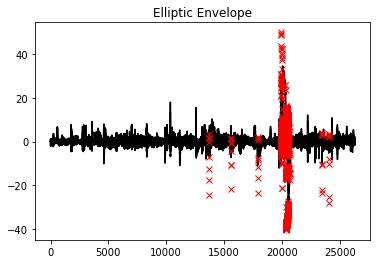

In [84]:
Yp=np.where(Yp==1, 0, Yp)
Yp=np.where(Yp==-1, 1, Yp)

Exactitud=accuracy_score(Yt, Yp)
Presicion=precision_score(Yt, Yp)
Sensibilidad=recall_score(Yt, Yp)
F1score=f1_score(Yt, Yp)

t=np.arange(0,len(Datos))
Xp0=Datos[np.where(Yp == 0)[0],:]      
Xp1=Datos[np.where(Yp == 1)[0],:]
t0=t[np.where(Yp == 0)]    
t1=t[np.where(Yp == 1)]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title(title)
plt.show()


In [85]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

Datos=np.load('Datos.npy',allow_pickle=True)
Datos=Datos[:,9:17]
Yt=np.load('Yt.npy',allow_pickle=True)

outlier_frac=0.01 #fracción de valores anomalos, valor por defecto es 0.1
Model=IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_frac)
title='Isolation Forest'
# Model = LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac)
# title='LOF'
# Model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
# title='OC-SVM'
Yp=Model.fit_predict(Datos)


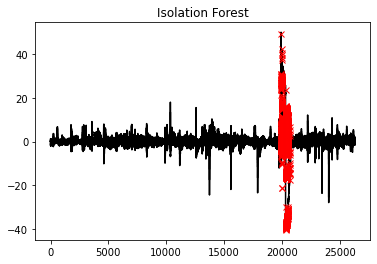

In [86]:
Yp=np.where(Yp==1, 0, Yp)
Yp=np.where(Yp==-1, 1, Yp)

Exactitud=accuracy_score(Yt, Yp)
Presicion=precision_score(Yt, Yp)
Sensibilidad=recall_score(Yt, Yp)
F1score=f1_score(Yt, Yp)

t=np.arange(0,len(Datos))
Xp0=Datos[np.where(Yp == 0)[0],:]      
Xp1=Datos[np.where(Yp == 1)[0],:]
t0=t[np.where(Yp == 0)]    
t1=t[np.where(Yp == 1)]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title(title)
plt.show()


In [87]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

Datos=np.load('Datos.npy',allow_pickle=True)
Datos=Datos[:,9:17]
Yt=np.load('Yt.npy',allow_pickle=True)

outlier_frac=0.01 #fracción de valores anomalos, valor por defecto es 0.1
Model = LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac)
title='LOF'
# Model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
# title='OC-SVM'
Yp=Model.fit_predict(Datos)


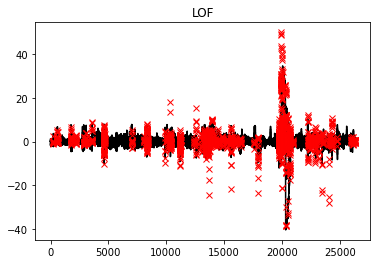

In [88]:
Yp=np.where(Yp==1, 0, Yp)
Yp=np.where(Yp==-1, 1, Yp)

Exactitud=accuracy_score(Yt, Yp)
Presicion=precision_score(Yt, Yp)
Sensibilidad=recall_score(Yt, Yp)
F1score=f1_score(Yt, Yp)

t=np.arange(0,len(Datos))
Xp0=Datos[np.where(Yp == 0)[0],:]      
Xp1=Datos[np.where(Yp == 1)[0],:]
t0=t[np.where(Yp == 0)]    
t1=t[np.where(Yp == 1)]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title(title)
plt.show()


In [89]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

Datos=np.load('Datos.npy',allow_pickle=True)
Datos=Datos[:,9:17]
Yt=np.load('Yt.npy',allow_pickle=True)

outlier_frac=0.01 #fracción de valores anomalos, valor por defecto es 0.1
Model = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma='auto')
title='OC-SVM'
Yp=Model.fit_predict(Datos)


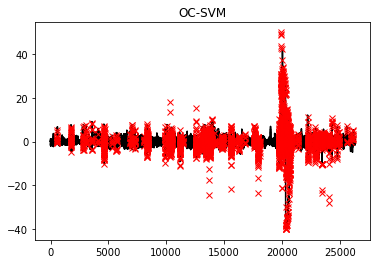

In [90]:
Yp=np.where(Yp==1, 0, Yp)
Yp=np.where(Yp==-1, 1, Yp)

Exactitud=accuracy_score(Yt, Yp)
Presicion=precision_score(Yt, Yp)
Sensibilidad=recall_score(Yt, Yp)
F1score=f1_score(Yt, Yp)

t=np.arange(0,len(Datos))
Xp0=Datos[np.where(Yp == 0)[0],:]      
Xp1=Datos[np.where(Yp == 1)[0],:]
t0=t[np.where(Yp == 0)]    
t1=t[np.where(Yp == 1)]

plt.figure()
plt.plot(t0,Xp0,'k')
plt.plot(t1,Xp1,'rx')
plt.title(title)
plt.show()


# ejemplo 2 

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm

Text(0.5, 1.0, 'Falla en pista interna R3 y falla en bolas R4')

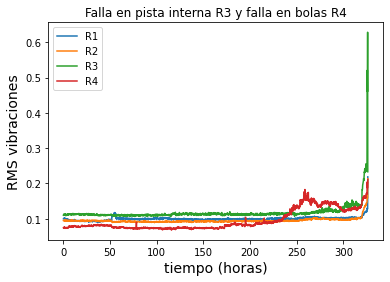

In [103]:
#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')

plt.figure()
plt.plot(t1/60,Datos1)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista interna R3 y falla en bolas R4')







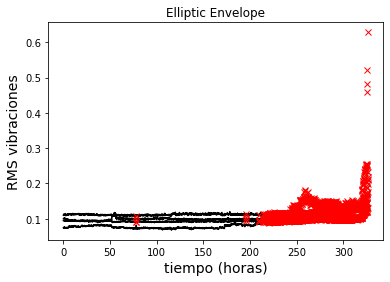

In [107]:
#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')

Datos_train=Datos1.to_numpy()[0:999,:] #caso 1: 999, caso 2: 449, caso 3: 2999
Datos_test=Datos1.to_numpy()

outlier_frac=0.001 #fracción de valores anomalos, valor por defecto es 0.1
Modelo=EllipticEnvelope(contamination=outlier_frac) 
title='Elliptic Envelope'
# Modelo=IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_frac) 
# title='Isolation Forest'
# Modelo=LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac, novelty=True) 
# title='Local Outlier Factor'
# Modelo = svm.OneClassSVM(nu=0.07, kernel="rbf", gamma='auto') 
# title='SVM‘

Modelo.fit(Datos_train)
Yp=Modelo.predict(Datos_test)


Xp0=Datos_test[np.where(Yp == 1)[0],:]      
Xp1=Datos_test[np.where(Yp == -1)[0],:]

t0=t1.to_numpy()[np.where(Yp == 1)]    
t1=t1.to_numpy()[np.where(Yp == -1)]

plt.figure()
plt.plot(t0/60,Xp0,'k')
plt.plot(t1/60,Xp1,'rx')
plt.title(title)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.show()

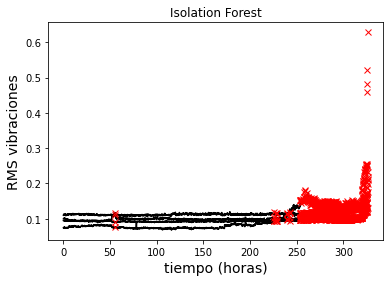

In [108]:
#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')

Datos_train=Datos1.to_numpy()[0:999,:] #caso 1: 999, caso 2: 449, caso 3: 2999
Datos_test=Datos1.to_numpy()

outlier_frac=0.001 #fracción de valores anomalos, valor por defecto es 0.1

Modelo=IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_frac) 
title='Isolation Forest'
# Modelo=LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac, novelty=True) 
# title='Local Outlier Factor'
# Modelo = svm.OneClassSVM(nu=0.07, kernel="rbf", gamma='auto') 
# title='SVM‘

Modelo.fit(Datos_train)
Yp=Modelo.predict(Datos_test)


Xp0=Datos_test[np.where(Yp == 1)[0],:]      
Xp1=Datos_test[np.where(Yp == -1)[0],:]

t0=t1.to_numpy()[np.where(Yp == 1)]    
t1=t1.to_numpy()[np.where(Yp == -1)]

plt.figure()
plt.plot(t0/60,Xp0,'k')
plt.plot(t1/60,Xp1,'rx')
plt.title(title)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.show()

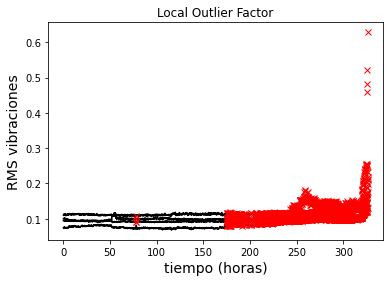

In [109]:
#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')

Datos_train=Datos1.to_numpy()[0:999,:] #caso 1: 999, caso 2: 449, caso 3: 2999
Datos_test=Datos1.to_numpy()

outlier_frac=0.001 #fracción de valores anomalos, valor por defecto es 0.1

Modelo=LocalOutlierFactor(n_neighbors=20, contamination=outlier_frac, novelty=True) 
title='Local Outlier Factor'
# Modelo = svm.OneClassSVM(nu=0.07, kernel="rbf", gamma='auto') 
# title='SVM‘

Modelo.fit(Datos_train)
Yp=Modelo.predict(Datos_test)


Xp0=Datos_test[np.where(Yp == 1)[0],:]      
Xp1=Datos_test[np.where(Yp == -1)[0],:]

t0=t1.to_numpy()[np.where(Yp == 1)]    
t1=t1.to_numpy()[np.where(Yp == -1)]

plt.figure()
plt.plot(t0/60,Xp0,'k')
plt.plot(t1/60,Xp1,'rx')
plt.title(title)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.show()

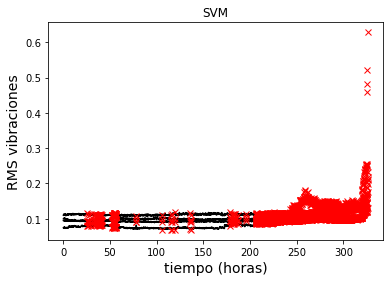

In [111]:
#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('RMSvibraciones1.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('time1.txt')

Datos_train=Datos1.to_numpy()[0:999,:] #caso 1: 999, caso 2: 449, caso 3: 2999
Datos_test=Datos1.to_numpy()

outlier_frac=0.001 #fracción de valores anomalos, valor por defecto es 0.1
Modelo = svm.OneClassSVM(nu=0.07, kernel="rbf", gamma='auto') 
title='SVM'

Modelo.fit(Datos_train)
Yp=Modelo.predict(Datos_test)


Xp0=Datos_test[np.where(Yp == 1)[0],:]      
Xp1=Datos_test[np.where(Yp == -1)[0],:]

t0=t1.to_numpy()[np.where(Yp == 1)]    
t1=t1.to_numpy()[np.where(Yp == -1)]

plt.figure()
plt.plot(t0/60,Xp0,'k')
plt.plot(t1/60,Xp1,'rx')
plt.title(title)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.show()